In [2]:
import os
import random
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import model_selection
from sklearn import preprocessing
import IPython.display as ipd


In [3]:
# load a wave data
def load_wave_data(audio_dir, file_name):
    file_path = os.path.join(audio_dir, file_name)
    x, fs = librosa.load(file_path, sr=44100)
    return x,fs

# change wave data to mel-stft
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=128)
    return melsp

# display wave in plots
def show_wave(x):
    plt.plot(x)
    plt.show()

# display wave in heatmap
def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs)
    plt.colorbar()
    plt.show()

# example data
x, fs = load_wave_data(audio_dir, meta_data.loc[0,"filename"])
melsp = calculate_melsp(x)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x.shape, melsp.shape, fs))
show_wave(x)
show_melsp(melsp, fs)



NameError: name 'audio_dir' is not defined

In [6]:
##データセットの作成
train_df = pd.read_csv("./train.tsv", delimiter='\t')
train_df = train_df.drop(train_df.columns[1],axis = 1)
train_df.info()
test_df = pd.read_csv("./test.tsv", delimiter='\t')
test_df = test_df.drop(test_df.columns[1],axis = 1)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8645 non-null   int64  
 1   season      8645 non-null   int64  
 2   yr          8645 non-null   int64  
 3   mnth        8645 non-null   int64  
 4   hr          8645 non-null   int64  
 5   holiday     8645 non-null   int64  
 6   weekday     8645 non-null   int64  
 7   workingday  8645 non-null   int64  
 8   weathersit  8645 non-null   int64  
 9   temp        8645 non-null   float64
 10  atemp       8645 non-null   float64
 11  hum         8645 non-null   float64
 12  windspeed   8645 non-null   float64
 13  cnt         8645 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 945.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8734 entries, 0 to 8733
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ---

In [7]:
##ランダムフォレストと勾配ブースティングによる解析
# インポート
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    train_df[train_df.columns[1:13]], train_df["cnt"], random_state=66)

# ランダムフォレストと勾配ブースティングのパラメータ設定
models = {
    'RandomForest': RandomForestRegressor(random_state=0),
    'GradientBoost': GradientBoostingRegressor(random_state=0)
}

# モデル構築
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

# 結果を表示
pd.Series(scores).unstack()

,test_score,train_score
GradientBoost,0.849550,0.868524
RandomForest,0.925477,0.990093


In [8]:
type(pd.Series(scores).unstack())

pandas.core.frame.DataFrame

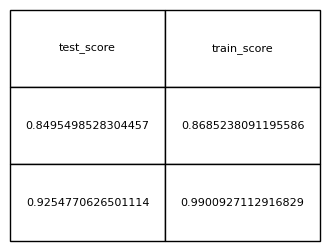

In [9]:
# dfは出力したいDataFrame
# wは横幅、hは縦幅
# outputPathは出力先のパス

def TablePlot(df,w,h,outputPath):
    fig, ax = plt.subplots(figsize=(w,h))
    ax.axis('off')
    ax.table(
        df.values,
        colLabels = df.columns,
        loc = 'center',
        bbox=[0,0,1,1]
    )
    plt.savefig(outputPath)
    plt.show()
TablePlot(pd.Series(scores).unstack(),4,3,"./")

In [10]:
#スコアが良かったのでランダムフォレストのみでやってみる
# インポート
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(train_df[train_df.columns[1:13]], train_df["cnt"], random_state=66)
#モデル構築
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train,y_train)
print(forest.score(X_test, y_test))

0.9254770626501114


<Axes: xlabel='mnth'>

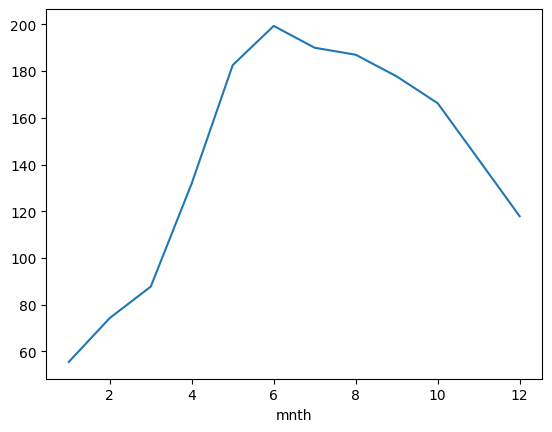

In [11]:
#各月の利用者数平均と月の折線グラフ
train_df.groupby("mnth")["cnt"].mean().plot()

Text(0.5, 0, 'importance of feature')

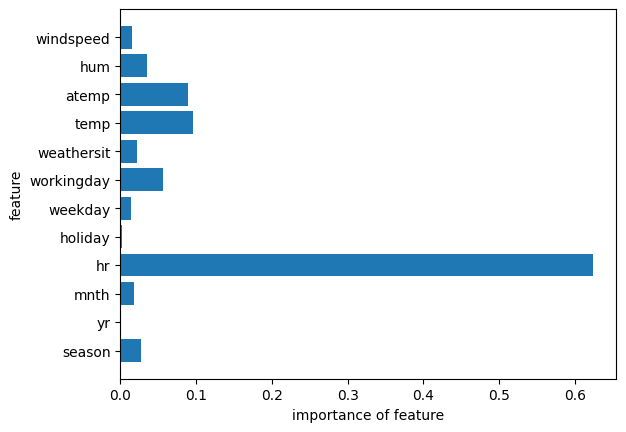

In [25]:
#特徴量の重要度を棒グラフにする
plt.barh(X_train.columns, forest.feature_importances_)
plt.ylabel("feature")
plt.xlabel("importance of feature")

In [15]:
model.columns

AttributeError: 'GradientBoostingRegressor' object has no attribute 'columns'

['id',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt']